In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

In [4]:
from google.colab import files #позволяет с локального компьютера загрузить в колаб какие то файлы
uploaded = files.upload()

Saving test_weather.csv to test_weather.csv
Saving train_weather.csv to train_weather.csv


In [5]:
train = pd.read_csv("train_weather.csv")
test = pd.read_csv("test_weather.csv")

In [6]:
test = test.drop(['Location'], axis=1)
train = train.drop(['Location'], axis=1)

In [7]:
train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.7,23.6,0.0,5.0,9.6,SSE,24.0,SSW,ESE,7.0,...,65.0,53.0,1028.4,1026.7,1.0,1.0,18.3,22.3,0,0
1,15.4,21.2,61.2,5.8,2.7,S,43.0,WSW,SSW,19.0,...,91.0,65.0,1018.8,1016.5,8.0,7.0,15.6,20.7,1,1
2,16.8,30.9,1.0,NaN,NaN,NE,35.0,NNW,NE,7.0,...,80.0,38.0,1020.4,1013.2,1.0,NaN,19.6,30.0,0,0
3,13.9,17.1,0.2,3.8,8.9,SE,37.0,SE,SSE,17.0,...,56.0,63.0,1027.7,1026.1,3.0,1.0,15.3,15.8,0,0
4,16.0,36.1,0.0,6.8,12.9,ENE,33.0,ENE,E,17.0,...,58.0,32.0,1018.5,1016.0,0.0,3.0,26.0,34.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121868,17.6,25.1,0.0,NaN,NaN,SSE,56.0,SE,E,9.0,...,58.0,58.0,1012.8,1010.2,NaN,NaN,23.5,24.2,0,0
121869,15.1,25.2,0.0,10.0,11.3,SW,48.0,S,WSW,11.0,...,55.0,41.0,1018.8,1018.3,NaN,NaN,19.0,24.6,0,0
121870,10.5,18.4,1.2,NaN,NaN,SSE,50.0,E,E,15.0,...,97.0,93.0,NaN,NaN,NaN,NaN,12.5,15.9,1,1
121871,13.6,19.8,2.6,NaN,7.5,WSW,54.0,WSW,WSW,11.0,...,76.0,46.0,1008.5,1007.4,NaN,NaN,14.4,18.9,1,1


In [8]:
test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,11.0,22.1,0.0,NaN,8.2,ESE,57.0,E,E,30.0,22.0,52.0,34.0,1028.5,1024.6,3.0,NaN,14.7,20.7,0
1,5.6,20.7,0.0,NaN,NaN,ESE,44.0,SE,NNE,7.0,24.0,65.0,42.0,1023.0,1018.1,NaN,NaN,13.9,20.3,0
2,9.5,18.4,0.0,1.6,NaN,SW,26.0,WNW,SSW,2.0,15.0,67.0,43.0,1024.7,1021.5,7.0,7.0,11.5,17.9,0
3,18.4,22.0,0.0,3.8,0.2,NaN,NaN,E,ESE,22.0,19.0,80.0,79.0,1019.5,1017.0,8.0,8.0,20.7,21.4,0
4,10.4,20.7,0.4,3.8,9.0,SSW,43.0,WSW,SW,15.0,26.0,55.0,38.0,1019.5,1022.4,5.0,4.0,15.7,18.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13536,13.1,26.7,0.2,NaN,NaN,W,52.0,N,WNW,13.0,28.0,58.0,35.0,1005.4,1003.9,NaN,NaN,19.4,26.0,0
13537,16.4,30.1,0.0,5.6,NaN,WSW,43.0,ENE,WSW,2.0,20.0,79.0,38.0,1003.2,1000.8,NaN,NaN,21.6,29.7,0
13538,22.9,32.9,0.0,NaN,NaN,E,52.0,E,ESE,28.0,20.0,23.0,17.0,1018.4,1015.0,NaN,1.0,25.2,31.4,0
13539,12.5,34.2,0.0,NaN,NaN,SSE,31.0,E,ESE,15.0,13.0,37.0,13.0,1021.8,1018.7,NaN,NaN,21.1,31.3,0


In [9]:
# размерность у train - это датафрейм в котором набор данных для обучения
print(train.shape)
# размерность у test
# shape - возвращает размерность датафрейма (кол-во строк, кол-во столбцов)
print(test.shape)

(121873, 21)
(13541, 20)


In [10]:
#есть ли пустые значения в данных? Nan
# name_dataframe.isna() - проверку на пустые значение
print("________________________________________")
print(train.isna().sum())
print("________________________________________")
print(test.isna().sum())

________________________________________
MinTemp           1221
MaxTemp           1031
Rainfall          2728
Evaporation      50544
Sunshine         56175
WindGustDir       8716
WindGustSpeed     8661
WindDir9am        8914
WindDir3pm        3354
WindSpeed9am      1519
WindSpeed3pm      2345
Humidity9am       2231
Humidity3pm       3382
Pressure9am      12635
Pressure3pm      12602
Cloud9am         46059
Cloud3pm         48476
Temp9am           1533
Temp3pm           2656
RainToday            0
RainTomorrow         0
dtype: int64
________________________________________
MinTemp           132
MaxTemp           123
Rainfall          285
Evaporation      5608
Sunshine         6211
WindGustDir       976
WindGustSpeed     968
WindDir9am        994
WindDir3pm        395
WindSpeed9am      176
WindSpeed3pm      283
Humidity9am       237
Humidity3pm       401
Pressure9am      1382
Pressure3pm      1381
Cloud9am         5134
Cloud3pm         5391
Temp9am           158
Temp3pm           319
Rain

In [11]:
test['Pressure3pm']=test['Pressure3pm'].fillna(test['Pressure3pm'].mean())

In [12]:
test['Pressure9am']=test['Pressure9am'].fillna(test['Pressure9am'].mean())

In [13]:
train['Pressure9am']=train['Pressure9am'].fillna(train['Pressure9am'].mean())

In [14]:
train['Pressure3pm']=train['Pressure3pm'].fillna(train['Pressure3pm'].mean())

In [15]:
# удалите этот столбец
# drop - позволяет удалять строки или столбцы
# axis = 1 - удаляем столбцы
# axis = 0 - удаляем строчки
train = train.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1)
print(train.isna().sum())
# Embarked 2
# dropna - удаляет пустые строчки или столбцы в которых есть Nan
# axis = 1 - удаляем столбцы
# axis = 0 - удаляем строчки
train = train.dropna()
print("___________После обработки всех пустых значений______________")
print(train.isna().sum())

MinTemp          1221
MaxTemp          1031
Rainfall         2728
WindGustDir      8716
WindGustSpeed    8661
WindDir9am       8914
WindDir3pm       3354
WindSpeed9am     1519
WindSpeed3pm     2345
Humidity9am      2231
Humidity3pm      3382
Pressure9am         0
Pressure3pm         0
Temp9am          1533
Temp3pm          2656
RainToday           0
RainTomorrow        0
dtype: int64
___________После обработки всех пустых значений______________
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


In [16]:
# удалите этот столбец
# drop - позволяет удалять строки или столбцы
# axis = 1 - удаляем столбцы
# axis = 0 - удаляем строчки
test = test.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1)
print(test.isna().sum())
# Embarked 2
# dropna - удаляет пустые строчки или столбцы в которых есть Nan
# axis = 1 - удаляем столбцы
# axis = 0 - удаляем строчки
#test = test.dropna()
print("___________После обработки всех пустых значений______________")
print(test.isna().sum())

MinTemp          132
MaxTemp          123
Rainfall         285
WindGustDir      976
WindGustSpeed    968
WindDir9am       994
WindDir3pm       395
WindSpeed9am     176
WindSpeed3pm     283
Humidity9am      237
Humidity3pm      401
Pressure9am        0
Pressure3pm        0
Temp9am          158
Temp3pm          319
RainToday          0
dtype: int64
___________После обработки всех пустых значений______________
MinTemp          132
MaxTemp          123
Rainfall         285
WindGustDir      976
WindGustSpeed    968
WindDir9am       994
WindDir3pm       395
WindSpeed9am     176
WindSpeed3pm     283
Humidity9am      237
Humidity3pm      401
Pressure9am        0
Pressure3pm        0
Temp9am          158
Temp3pm          319
RainToday          0
dtype: int64


In [17]:
clist = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']

In [18]:
test[clist]=test[clist].fillna(test[clist].mean())

In [19]:
print(test.shape)

(13541, 16)


In [20]:
train = pd.get_dummies(train, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm'])
train

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.7,23.6,0.0,24.0,7.0,9.0,65.0,53.0,1028.400000,1026.700000,...,0,0,0,0,0,0,0,0,0,0
1,15.4,21.2,61.2,43.0,19.0,24.0,91.0,65.0,1018.800000,1016.500000,...,0,0,0,0,0,1,0,0,0,0
2,16.8,30.9,1.0,35.0,7.0,26.0,80.0,38.0,1020.400000,1013.200000,...,0,0,0,0,0,0,0,0,0,0
3,13.9,17.1,0.2,37.0,17.0,20.0,56.0,63.0,1027.700000,1026.100000,...,0,0,0,0,1,0,0,0,0,0
4,16.0,36.1,0.0,33.0,17.0,19.0,58.0,32.0,1018.500000,1016.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121868,17.6,25.1,0.0,56.0,9.0,19.0,58.0,58.0,1012.800000,1010.200000,...,0,0,0,0,0,0,0,0,0,0
121869,15.1,25.2,0.0,48.0,11.0,28.0,55.0,41.0,1018.800000,1018.300000,...,0,0,0,0,0,0,0,0,0,1
121870,10.5,18.4,1.2,50.0,15.0,13.0,97.0,93.0,1017.671683,1015.276048,...,0,0,0,0,0,0,0,0,0,0
121871,13.6,19.8,2.6,54.0,11.0,20.0,76.0,46.0,1008.500000,1007.400000,...,0,0,0,0,0,0,0,0,0,1


In [21]:
test = pd.get_dummies(test, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm'])
test

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,11.0,22.1,0.0,57.000000,30.0,22.0,52.0,34.0,1028.5,1024.6,...,0,0,0,0,0,0,0,0,0,0
1,5.6,20.7,0.0,44.000000,7.0,24.0,65.0,42.0,1023.0,1018.1,...,0,0,0,0,0,0,0,0,0,0
2,9.5,18.4,0.0,26.000000,2.0,15.0,67.0,43.0,1024.7,1021.5,...,0,0,0,0,0,1,0,0,0,0
3,18.4,22.0,0.0,40.173785,22.0,19.0,80.0,79.0,1019.5,1017.0,...,0,0,0,0,0,0,0,0,0,0
4,10.4,20.7,0.4,43.000000,15.0,26.0,55.0,38.0,1019.5,1022.4,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13536,13.1,26.7,0.2,52.000000,13.0,28.0,58.0,35.0,1005.4,1003.9,...,0,0,0,0,0,0,0,0,1,0
13537,16.4,30.1,0.0,43.000000,2.0,20.0,79.0,38.0,1003.2,1000.8,...,0,0,0,0,0,0,0,0,0,1
13538,22.9,32.9,0.0,52.000000,28.0,20.0,23.0,17.0,1018.4,1015.0,...,0,0,0,0,0,0,0,0,0,0
13539,12.5,34.2,0.0,31.000000,15.0,13.0,37.0,13.0,1021.8,1018.7,...,0,0,0,0,0,0,0,0,0,0


In [22]:
import numpy as np

train['row_num'] = np.arange(len(train))
print (train)

        MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0          13.7     23.6       0.0           24.0           7.0           9.0   
1          15.4     21.2      61.2           43.0          19.0          24.0   
2          16.8     30.9       1.0           35.0           7.0          26.0   
3          13.9     17.1       0.2           37.0          17.0          20.0   
4          16.0     36.1       0.0           33.0          17.0          19.0   
...         ...      ...       ...            ...           ...           ...   
121868     17.6     25.1       0.0           56.0           9.0          19.0   
121869     15.1     25.2       0.0           48.0          11.0          28.0   
121870     10.5     18.4       1.2           50.0          15.0          13.0   
121871     13.6     19.8       2.6           54.0          11.0          20.0   
121872      6.9     15.9       0.2           20.0           9.0          11.0   

        Humidity9am  Humidi

In [23]:
import numpy as np

test['row_num'] = np.arange(len(test))
print (test)

       MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0         11.0     22.1       0.0      57.000000          30.0          22.0   
1          5.6     20.7       0.0      44.000000           7.0          24.0   
2          9.5     18.4       0.0      26.000000           2.0          15.0   
3         18.4     22.0       0.0      40.173785          22.0          19.0   
4         10.4     20.7       0.4      43.000000          15.0          26.0   
...        ...      ...       ...            ...           ...           ...   
13536     13.1     26.7       0.2      52.000000          13.0          28.0   
13537     16.4     30.1       0.0      43.000000           2.0          20.0   
13538     22.9     32.9       0.0      52.000000          28.0          20.0   
13539     12.5     34.2       0.0      31.000000          15.0          13.0   
13540      1.1     13.1       0.0      30.000000           7.0           6.0   

       Humidity9am  Humidity3pm  Pressu

In [24]:
print(test.shape)

(13541, 62)


In [25]:
%%time
from sklearn.model_selection import train_test_split

# Выделим вектор признаков Х и вектор ответов y
X = train.drop(['RainTomorrow'], axis=1)
y = train['RainTomorrow']

# train - на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression()
# model = KMeans()
# model = LinearRegression()

# модель учится, для этого ей нужны правильные
model.fit(X_train, y_train)

# тестируем, для признаков у которых нет ответов, мы предсказывает ответ
answers_pred = model.predict(X_test)

CPU times: user 4.07 s, sys: 691 ms, total: 4.76 s
Wall time: 2.63 s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
print(test.shape)

(13541, 62)


--------------МЕТОДОМ LOG_REG 84%-----------------

In [27]:
from sklearn.metrics import accuracy_score

# Как оценить насколько хорошо работает ваша модель?

# answers_pred - ответы которые вернула модель для X_test
# y_test - это правильные ответы для X_test
print(accuracy_score(y_test,answers_pred))

0.8403827440804411


In [28]:
print(X_train.shape)
print(y_train.shape)

(71936, 62)
(71936,)


In [29]:
print(test.shape)

(13541, 62)


In [30]:
test.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,row_num
count,13541.000000,13541.000000,13541.000000,13541.000000,13541.000000,13541.000000,13541.000000,13541.000000,13541.000000,13541.000000,...,13541.000000,13541.000000,13541.000000,13541.000000,13541.000000,13541.000000,13541.000000,13541.000000,13541.000000,13541.000000
mean,12.166962,23.175779,2.432981,40.173785,14.148447,18.741665,68.675135,51.600304,1017.608496,1015.200798,...,0.057381,0.066982,0.076139,0.066539,0.057529,0.061074,0.069123,0.061148,0.066686,6770.000000
std,6.376236,7.070051,8.840595,13.030175,8.877334,8.729262,19.080932,20.675467,6.669865,6.596978,...,0.232578,0.250000,0.265230,0.249231,0.232859,0.239474,0.253673,0.239610,0.249487,3909.094332
min,-8.500000,-3.100000,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,986.900000,982.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.700000,18.100000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.600000,1011.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3385.000000
50%,12.100000,22.700000,0.000000,39.000000,13.000000,18.741665,69.000000,51.600304,1017.608496,1015.200798,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6770.000000
75%,16.800000,28.100000,1.000000,46.000000,19.000000,24.000000,83.000000,66.000000,1021.700000,1019.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10155.000000
max,30.200000,46.800000,371.000000,117.000000,69.000000,87.000000,100.000000,100.000000,1040.200000,1036.800000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13540.000000


In [31]:
answers_pred = model.predict(test)
answers_pred.shape

(13541,)

In [91]:
print(test.shape)

(13541, 62)


In [33]:
df = pd.DataFrame(answers_pred, columns = ['RainTomorrow'])
df = df.reset_index()

In [34]:
df

,index,RainTomorrow
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0
...,...,...
13536,13536,0
13537,13537,0
13538,13538,0
13539,13539,0


In [35]:
df['RainTomorrow'].value_counts()

0    11438
1     2103
Name: RainTomorrow, dtype: int64

In [36]:
df.to_csv(r'Log_Reg.csv', index=False)

In [100]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_st = scaler.fit_transform(X)

pd.DataFrame(X_st, columns = X.columns)

# X - вектор признаков исходного набора
# X_st - вектор стандартизированных признаков

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,row_num
0,0.229417,0.046776,-0.276750,-1.249156,-0.968198,-1.196918,-0.138581,0.104290,1.614216,1.733043,...,-0.252145,-0.275261,-0.276955,-0.268262,-0.247462,-0.266444,-0.281651,-0.264154,-0.270878,-1.732034
1,0.498773,-0.290169,6.915073,0.161361,0.465786,0.546209,1.227335,0.678189,0.198278,0.212238,...,-0.252145,-0.275261,-0.276955,-0.268262,4.041021,-0.266444,-0.281651,-0.264154,-0.270878,-1.732000
2,0.720596,1.071651,-0.159236,-0.432541,-0.968198,0.778626,0.649448,-0.613082,0.434268,-0.279787,...,-0.252145,-0.275261,-0.276955,-0.268262,-0.247462,-0.266444,-0.281651,-0.264154,-0.270878,-1.731967
3,0.261106,-0.865783,-0.253247,-0.284066,0.226789,0.081375,-0.611398,0.582539,1.510971,1.643584,...,-0.252145,-0.275261,-0.276955,3.727705,-0.247462,-0.266444,-0.281651,-0.264154,-0.270878,-1.731933
4,0.593840,1.801698,-0.276750,-0.581017,0.226789,-0.034833,-0.506328,-0.900032,0.154030,0.137689,...,-0.252145,-0.275261,-0.276955,-0.268262,-0.247462,-0.266444,-0.281651,-0.264154,-0.270878,-1.731899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102761,0.847351,0.257367,-0.276750,1.126452,-0.729201,-0.034833,-0.506328,0.343415,-0.686684,-0.727083,...,-0.252145,-0.275261,-0.276955,-0.268262,-0.247462,-0.266444,-0.281651,-0.264154,-0.270878,1.731899
102762,0.451240,0.271406,-0.276750,0.532550,-0.490203,1.011043,-0.663933,-0.469608,0.198278,0.480615,...,-0.252145,-0.275261,-0.276955,-0.268262,-0.247462,-0.266444,-0.281651,-0.264154,3.691695,1.731933
102763,-0.277605,-0.683271,-0.135734,0.681025,-0.012208,-0.732084,1.542547,2.017285,0.031858,0.029749,...,-0.252145,-0.275261,-0.276955,-0.268262,-0.247462,-0.266444,-0.281651,-0.264154,-0.270878,1.731967
102764,0.213573,-0.486720,0.028785,0.977976,-0.490203,0.081375,0.439307,-0.230484,-1.320906,-1.144559,...,-0.252145,-0.275261,-0.276955,-0.268262,-0.247462,-0.266444,-0.281651,-0.264154,3.691695,1.732000


In [101]:
from sklearn.neighbors import KNeighborsClassifier # классификатор
from sklearn.neighbors import KNeighborsRegressor # регрессор

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

# создаем модель
# как подобрать лучшее число соседей?
scores = []
for i in range(1,15):
    score = {}
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    answers = knn.predict(X_test) # метод predict возвращает вектор ответов для X_test
    
    score['k'] = i
    score['accuracy'] = accuracy_score(answers,y_test)
    score['recall'] = recall_score(answers,y_test)
    score['presicion'] = precision_score(answers,y_test)
    
    scores.append(score)

scores = pd.DataFrame(scores)
scores

,k,accuracy,recall,presicion
0,1,0.757473,0.444902,0.384838
1,2,0.792591,0.609290,0.176401
2,3,0.792591,0.554348,0.322742
3,4,0.798546,0.658922,0.186948
4,5,0.801991,0.618011,0.276862
5,6,0.798897,0.681439,0.172314
6,7,0.803859,0.657112,0.238761
7,8,0.798429,0.704327,0.154515
8,9,0.802429,0.679718,0.203691
9,10,0.796766,0.717680,0.135399


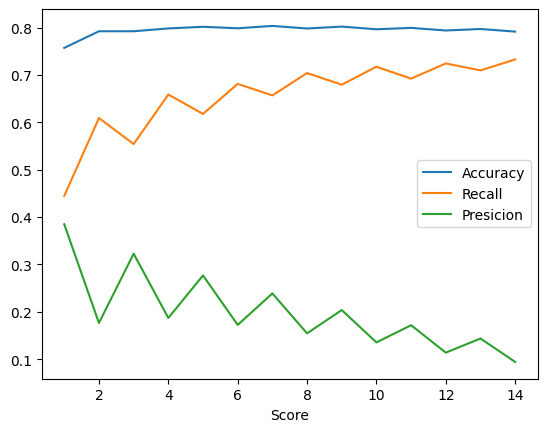

In [102]:
plt.plot(scores['k'], scores['accuracy'], label='Accuracy')
plt.plot(scores['k'], scores['recall'], label='Recall')
plt.plot(scores['k'], scores['presicion'], label='Presicion')
plt.xlabel('K')
plt.xlabel('Score')
plt.legend()

In [103]:
knn = KNeighborsClassifier(5)

# обучаем
knn.fit(X_train,y_train)

# предсказываем значения
y_pred = knn.predict(X_test)

confusion_matrix(y_test,y_pred)

array([[25373,  1298],
       [ 5485,  2100]])

-------------------Метод KNN 80%-------------------

In [104]:
from sklearn.metrics import accuracy_score

# Как оценить насколько хорошо работает ваша модель?

# answers_pred - ответы которые вернула модель для X_test
# y_test - это правильные ответы для X_test
print(accuracy_score(y_test,y_pred))

0.8019908921064923


In [111]:
y_pred_tree = knn.predict(test)

In [112]:
df_KNN = pd.DataFrame(y_pred_tree, columns = ['RainTomorrow'])
df_KNN = df_KNN.reset_index()

In [113]:
df_KNN

,index,RainTomorrow
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
13536,13536,0
13537,13537,0
13538,13538,0
13539,13539,0


In [114]:
df_KNN.to_csv(r'KNN.csv', index=False)

In [116]:
from sklearn.tree import DecisionTreeClassifier
# DecisionTreeRegression
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=1/3, random_state=42)

clf = DecisionTreeClassifier(max_depth=4, random_state=1)

clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)

y_pred_tree

array([0, 0, 0, ..., 0, 0, 0])

---------------------Метод Tree 83%-----------------------

In [117]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print("Accuracy:", accuracy_score(y_test,y_pred_tree))
print("Recall:", recall_score(y_test,y_pred_tree))
print("Precision:", precision_score(y_test,y_pred_tree))

Accuracy: 0.8380721625408688
Recall: 0.4067237969676994
Precision: 0.7466118102613747


In [118]:
y_pred_tree_test = clf.predict(test)

In [119]:
df_tree = pd.DataFrame(y_pred_tree_test, columns = ['RainTomorrow'])
df_tree = df_tree.reset_index()

In [120]:
df_tree

,index,RainTomorrow
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
13536,13536,0
13537,13537,0
13538,13538,0
13539,13539,0


In [121]:
df_tree.to_csv(r'Tree.csv', index=False)

-------Log_Reg 0.83595------Tree 0.83704------KNN 0.79952--------


Таким образом самым лучшим в данной задаче является метод Tree, но не далеко от него ушел и метод Log_Reg